### WGU D212 Data Mining II
# Task 1 - Clustering Techniques

#### Ednalyn C. De Dios
#### August 24, 2023

# Part I - Research Question

## A1. Propose one relevant question and choose a clustering technique.

> ### _What are the different groups within the organization's customer base?_

We will endeavor to answer the above question by using the K-means method.

## A2. Define one goal of the data analysis.

The ultimate goal of this data analysis is to reduce operating costs by increasing the efficiency of the organization's marketing efforts. We will use the K-means clustering technique identify the different groups within the organization's customer base and segment them accordingly. The organization will benefit from knowing the similarities and differences between customer groups because the knowledge will greatly influence how marketing is conducted. This will inform the decisions of stakeholders in matters where customer retention is involved, for example. Knowing which group a particular customer belong in will provide the organization with advanced insight towards that customer's characteristics or behavior. Thereby increasing the effective of marketing campaigns.

This goal is within the scope of the scenario and is represented in the available data.

# Part II - Method Justification

## B1. Explain how the clustering technique you chose analyzes the selected dataset. Include expected outcomes.

I chose K-means it's relatively easy to implement, scales to large data sets, and guarantees convergence. (Google.com, 2023). K-means works by taking data points as input and groups them into groups or k number of clusters.It starts the training process of grouping by selecting a number of starting center points called centroids. The algorithm then takes each data point and assigns them to the nearest centroid. Based on the new assignments, the centroids are then recalculated and the whole process repeats until they converge.

I expect the model to show the groupings of k number of clusters that are similar to each other (the data points are similar, not necessarily the clusters themselves.) I also expect a summary of the model's performance, such as silhoutte score.


## B2. Summarize one assumption of the chosen clustering technique.

One core assumption of K-means is that the "scales of different variables are specified so they can be reasonably combined using sum-of-squares as the measure to be minimised" (Henry, 2022). In other words, using K-means assumes that the radius of each cluster is the same. 

## B3. List the packages or libraries you have chosen for Python or R, and justify how each item on the list supports the analysis.

The packages/libraries I've chosen are:

- sys: for running the executable file (d209_task1.py)
- random: set random seed for reproducibility of the experiment
- pandas: for manipulating dataframes
- numpy: for performing mathematical computations
- matplotlib and seaborn: for visualizations
- Image: display image from a URL
- StandardScaler: to scale the data set
- train_test_split: to split the data into train and test sets
+++
- GridSearchCV: to optimize the model

# Part III - Data Preparation

## C1. Describe one data preprocessing goal relevant to the clustering technique from part A1.

One preprocessing goal is to standardize the variables to satisfy the spherical assumption of k-means. We will accomplish this using StandardScaler.

## C2. Identify the initial data set variables that you will use to analyze the classification question from part A1, and classify each variable as continuous or categorical.

Independent Variables:
- Children, Continuous, Quantitative
- Age, Continuous, Quantitative
- Income, Continuous, Quantitative
- Tenure, Continuous, Quantitative


## C3. Explain each of the steps used to prepare the data for the analysis. Identify the code segment for each step.

- Load and view the data
  > use pandas to read the csv
  > use head or tail methods
  > use info()
- Remove irrelevant data for the analysis
  > use the drop method
- Perform data cleaning
  > remove duplicates, missing values, outliers
- Pre-process data
  > scale the features

In [1]:
# setting the random seed for reproducibility
import random
random.seed(493)

# for manipulating dataframes
import pandas as pd
import numpy as np

# for visualizations
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
from IPython.display import Image

# for modeling
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# to print out all the outputs of the cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

In [2]:
# read the csv file
df = pd.read_csv('churn_clean.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   UID                   10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  TimeZone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              10000 non-null  int64  
 15  Age                 

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,Urban,America/Sitka,Environmental health practitioner,0,68,28561.99,Widowed,Male,No,7.978323,10,0,1,No,One year,Yes,Yes,Fiber Optic,Yes,No,Yes,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.795513,172.455519,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,Urban,America/Detroit,"Programmer, multimedia",1,27,21704.77,Married,Female,Yes,11.699080,12,0,1,Yes,Month-to-month,No,Yes,Fiber Optic,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Bank Transfer(automatic),1.156681,242.632554,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,Urban,America/Los_Angeles,Chief Financial Officer,4,50,9609.57,Widowed,Female,No,10.752800,9,0,1,Yes,Two Year,Yes,No,DSL,Yes,Yes,No,No,No,No,No,Yes,Yes,Credit Card (automatic),15.754144,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863,Suburban,America/Los_Angeles,Solicitor,1,48,18925.23,Married,Male,No,14.913540,15,2,0,Yes,Two Year,No,No,DSL,Yes,No,Yes,No,No,No,Yes,No,Yes,Mailed Check,17.087227,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352,Suburban,America/Chicago,Medical illustrator,0,83,40074.19,Separated,Male,Yes,8.147417,16,2,1,No,Month-to-month,Yes,No,Fiber Optic,No,No,No,No,No,Yes,Yes,No,No,Mailed Check,1.670972,149.948316,271.493436,4,4,4,3,4,4,4,5


In [3]:
columns = ['Children',
          'Age',
          'Income',
          'Tenure']

In [4]:
dfx = df[columns]

{'whiskers': [<matplotlib.lines.Line2D at 0x1b9d9dc0c70>,
 'caps': [<matplotlib.lines.Line2D at 0x1b9d9de11f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b9d9dc09d0>],
 'medians': [<matplotlib.lines.Line2D at 0x1b9d9de1730>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b9d9de19d0>],
 'means': []}

{'whiskers': [<matplotlib.lines.Line2D at 0x1b9d9e2c790>,
 'caps': [<matplotlib.lines.Line2D at 0x1b9d9e2cd00>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b9d9e2c640>],
 'medians': [<matplotlib.lines.Line2D at 0x1b9d9e3a280>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b9d9e3a520>],
 'means': []}

{'whiskers': [<matplotlib.lines.Line2D at 0x1b9d9e83040>,
 'caps': [<matplotlib.lines.Line2D at 0x1b9d9e83700>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b9d9e83160>],
 'medians': [<matplotlib.lines.Line2D at 0x1b9d9e83c40>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b9d9e83ee0>],
 'means': []}

{'whiskers': [<matplotlib.lines.Line2D at 0x1b9d9ec7cd0>,
 'caps': [<matplotlib.lines.Line2D at 0x1b9d9ed7250>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b9d9ec7a30>],
 'medians': [<matplotlib.lines.Line2D at 0x1b9d9ed7790>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b9d9ed7a30>],
 'means': []}

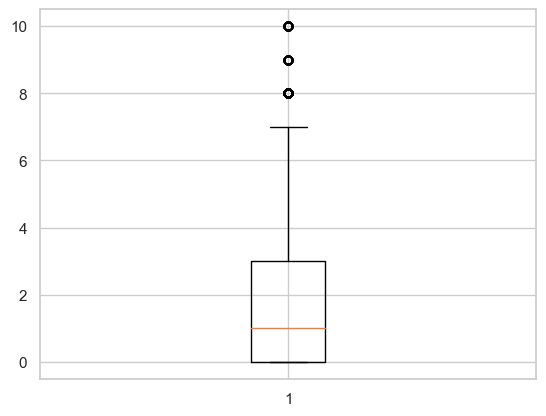

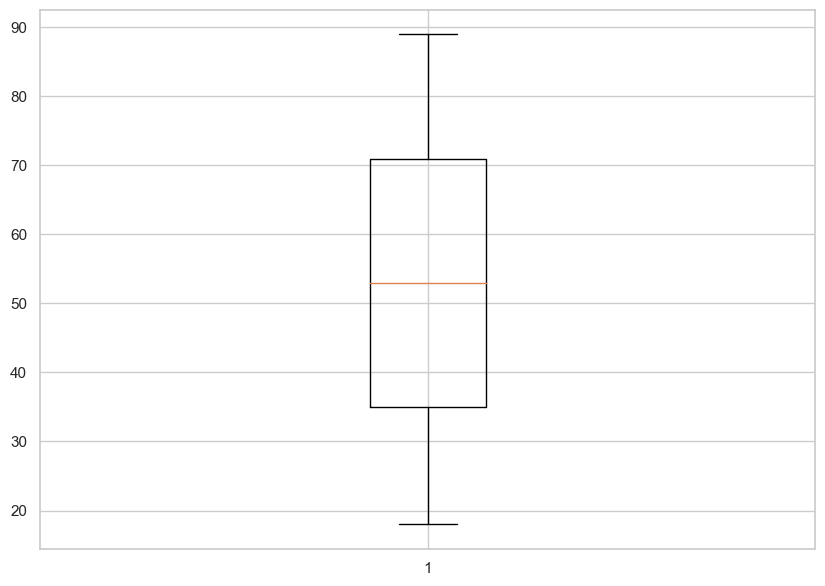

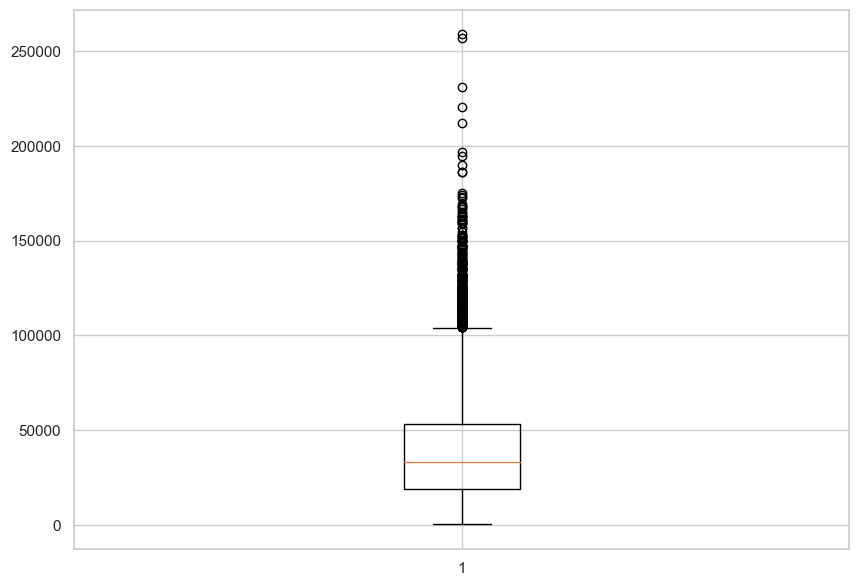

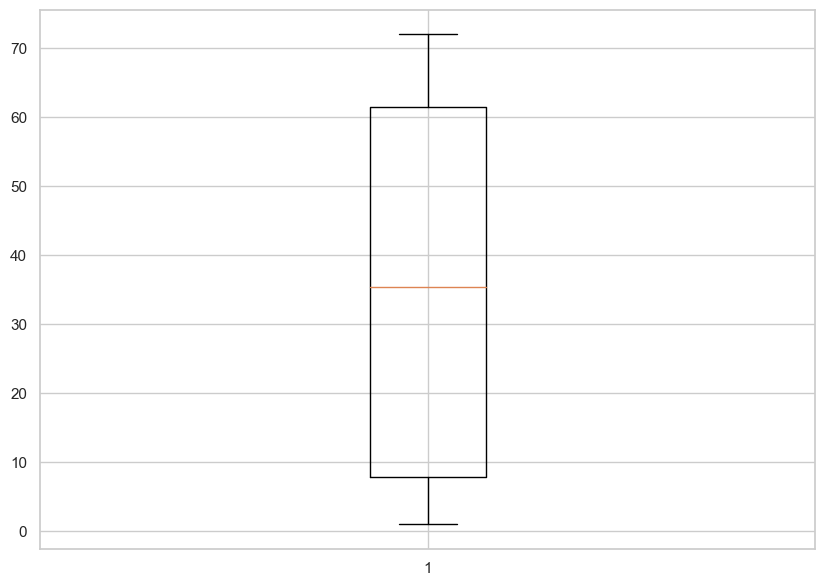

<Figure size 1000x700 with 0 Axes>

In [5]:
for col in columns:
    # show outliers
    plt.boxplot(df[col])
    fig = plt.figure(figsize =(10, 7))

In [6]:
# remove outliers in "Children"
df = dfx[dfx['Children'] < 8]
df.shape

(9599, 4)

In [7]:
# select rows that are duplicated based on all columns
dup = df[df.duplicated()]

# find out how many rows are duplicated
dup.shape

(0, 4)

In [8]:
def show_missing(df):
    """
    Takes a dataframe and returns a dataframe with stats
    on missing and null values with their percentages.
    """
    null_count = df.isnull().sum()
    null_percentage = (null_count / df.shape[0]) * 100
    empty_count = pd.Series(((df == ' ') | (df == '')).sum())
    empty_percentage = (empty_count / df.shape[0]) * 100
    nan_count = pd.Series(((df == 'nan') | (df == 'NaN')).sum())
    nan_percentage = (nan_count / df.shape[0]) * 100
    dfx = pd.DataFrame({'num_missing': null_count, 'missing_percentage': null_percentage,
                         'num_empty': empty_count, 'empty_percentage': empty_percentage,
                         'nan_count': nan_count, 'nan_percentage': nan_percentage})
    return dfx

show_missing(df)

,num_missing,missing_percentage,num_empty,empty_percentage,nan_count,nan_percentage
Children,0,0.0,0,0.0,0,0.0
Age,0,0.0,0,0.0,0,0.0
Income,0,0.0,0,0.0,0,0.0
Tenure,0,0.0,0,0.0,0,0.0


array([[<Axes: title={'center': 'Children'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Income'}>,
        <Axes: title={'center': 'Tenure'}>]], dtype=object)

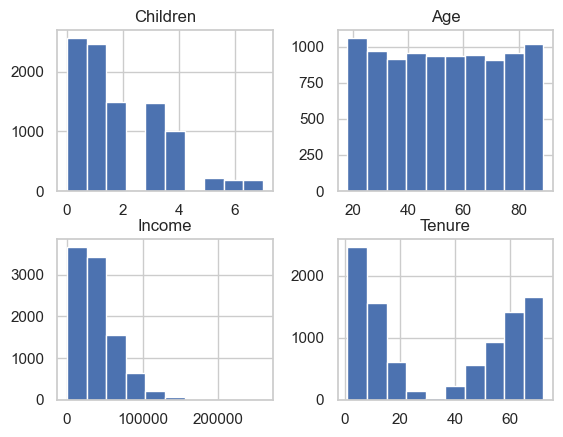

In [9]:
# make historgrams and save the plot
df[columns].hist()

In [ ]:
# scale the data
scaler = StandardScaler()

# apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
df[columns] = scaler.fit_transform(df[col])

df.head()